In [24]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from IPython.display import Image

In [14]:
class LLMState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixs:int
    strike_rate:float
    boundary_percent:float
    balls_per_boundary:float
    summary:str

In [42]:
graph=StateGraph(LLMState)

In [38]:
def calculate_sr(state:LLMState)->LLMState:
    state['strike_rate']=(state['runs']/state['balls'])*100
    return {'strike_rate':state['strike_rate']}

In [39]:
def calculate_bp(state:LLMState)->LLMState:
    state['boundary_percent']=((4*state['fours'] + 6*state['sixs'])/state['runs']) * 100
    return {'boundary_percent':state['boundary_percent']}

In [40]:
def calculate_bpb(state:LLMState)->LLMState:
    state['balls_per_boundary']= state['balls'] / (state['fours']+ state['sixs'])
    return {'balls_per_boundary':state['balls_per_boundary']}

In [41]:
def generate_summary(state:LLMState)->LLMState:
    summary=f"""
        Strike Rate : {state['strike_rate']}\n
        Balls Per Boundary : {state['balls_per_boundary']} \n
        Boundary Percent : {state['boundary_percent']} \n 
    """
    state['summary']=summary
    return state

In [43]:
graph.add_node('strike_rate',calculate_sr)
graph.add_node('boundary_percent',calculate_bp)
graph.add_node('balls_per_boundary',calculate_bpb)
graph.add_node('summary',generate_summary)

graph.add_edge(START,'strike_rate')
graph.add_edge(START,'boundary_percent')
graph.add_edge(START,'balls_per_boundary')

graph.add_edge('strike_rate','summary')
graph.add_edge('boundary_percent','summary')
graph.add_edge('balls_per_boundary','summary')

graph.add_edge('summary',END)

workflow=graph.compile()

In [44]:
output_state=workflow.invoke({'runs':100, 'balls':45, 'fours':10, 'sixs':5})
print(output_state)

{'runs': 100, 'balls': 45, 'fours': 10, 'sixs': 5, 'strike_rate': 222.22222222222223, 'boundary_percent': 70.0, 'balls_per_boundary': 3.0, 'summary': '\n        Strike Rate : 222.22222222222223\n\n        Balls Per Boundary : 3.0 \n\n        Boundary Percent : 70.0 \n \n    '}


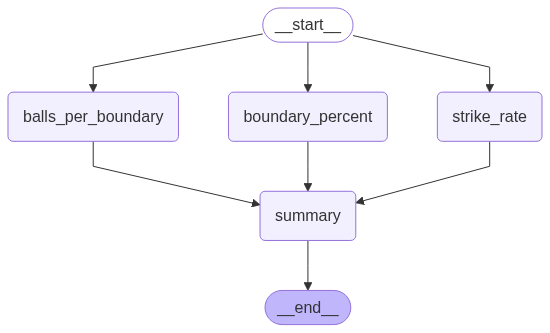

In [45]:
Image(workflow.get_graph().draw_mermaid_png())